<a href="https://colab.research.google.com/github/ahmad123576/machine-learning/blob/main/KNN_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn import datasets
digits=datasets.load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
df['target']=digits.target
df.head(20)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'), digits.target, test_size=0.3)

In [15]:
len(X_train)

1257

In [16]:
len(X_test)

540

In [17]:
# lets create KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
knn.score(X_test,y_test)

0.987037037037037

In [22]:
# confusion matrix now
from sklearn.metrics import confusion_matrix
y_predicted=knn.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 56,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  3,  0,  2,  0,  0,  0,  0, 53,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 44]])

Text(95.72222222222221, 0.5, 'Truth')

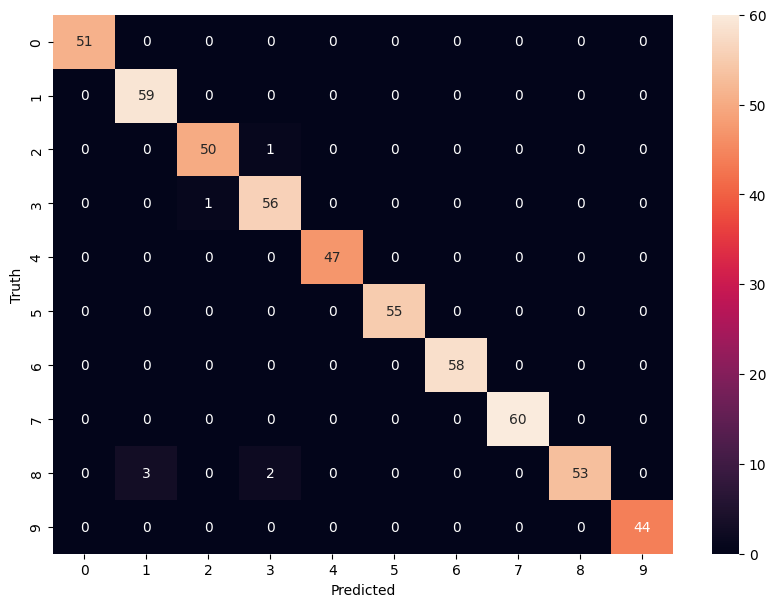

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
# classification report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.95      1.00      0.98        59
           2       0.98      0.98      0.98        51
           3       0.95      0.98      0.97        57
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        55
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        60
           8       1.00      0.91      0.95        58
           9       1.00      1.00      1.00        44

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

